### Notebook to plot horizontal mixing coefficients for GoM1pt5 mesh.
Start with horizontal viscosity, then the tracers. MPAS-O uses harmonic and biharmonic horizonal mixing for momentum, none for tracers. TXLA ROMS model uses harmonic mixing for momentum and tracers, no biharmonic mixing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### MPAS-O scaling 

In [66]:
cellWidth = np.arange(1.2*1000,101*1000) #
ref_width = 30000 #30 km reference width set to true in namelist
meshScalingDel2 = cellWidth/ref_width
del2_0 = 1000
visc2 = del2_0*meshScalingDel2

meshScalingDel4 = (cellWidth/ref_width)**3
del4_0 = 1.2E11
visc4 = del4_0*meshScalingDel4

### TXLA ROMS scaling

In [67]:
txla_width = np.arange(650, 3500)
area_txla = txla_width**2 # Assume simple rectangles for plot

dA = area_txla
dA_max = (np.sqrt(dA)).max()
kh_0 = 5.0 #m^2/s
kh = (kh_0/dA_max)*(np.sqrt(dA))

### Plot on double log scale 

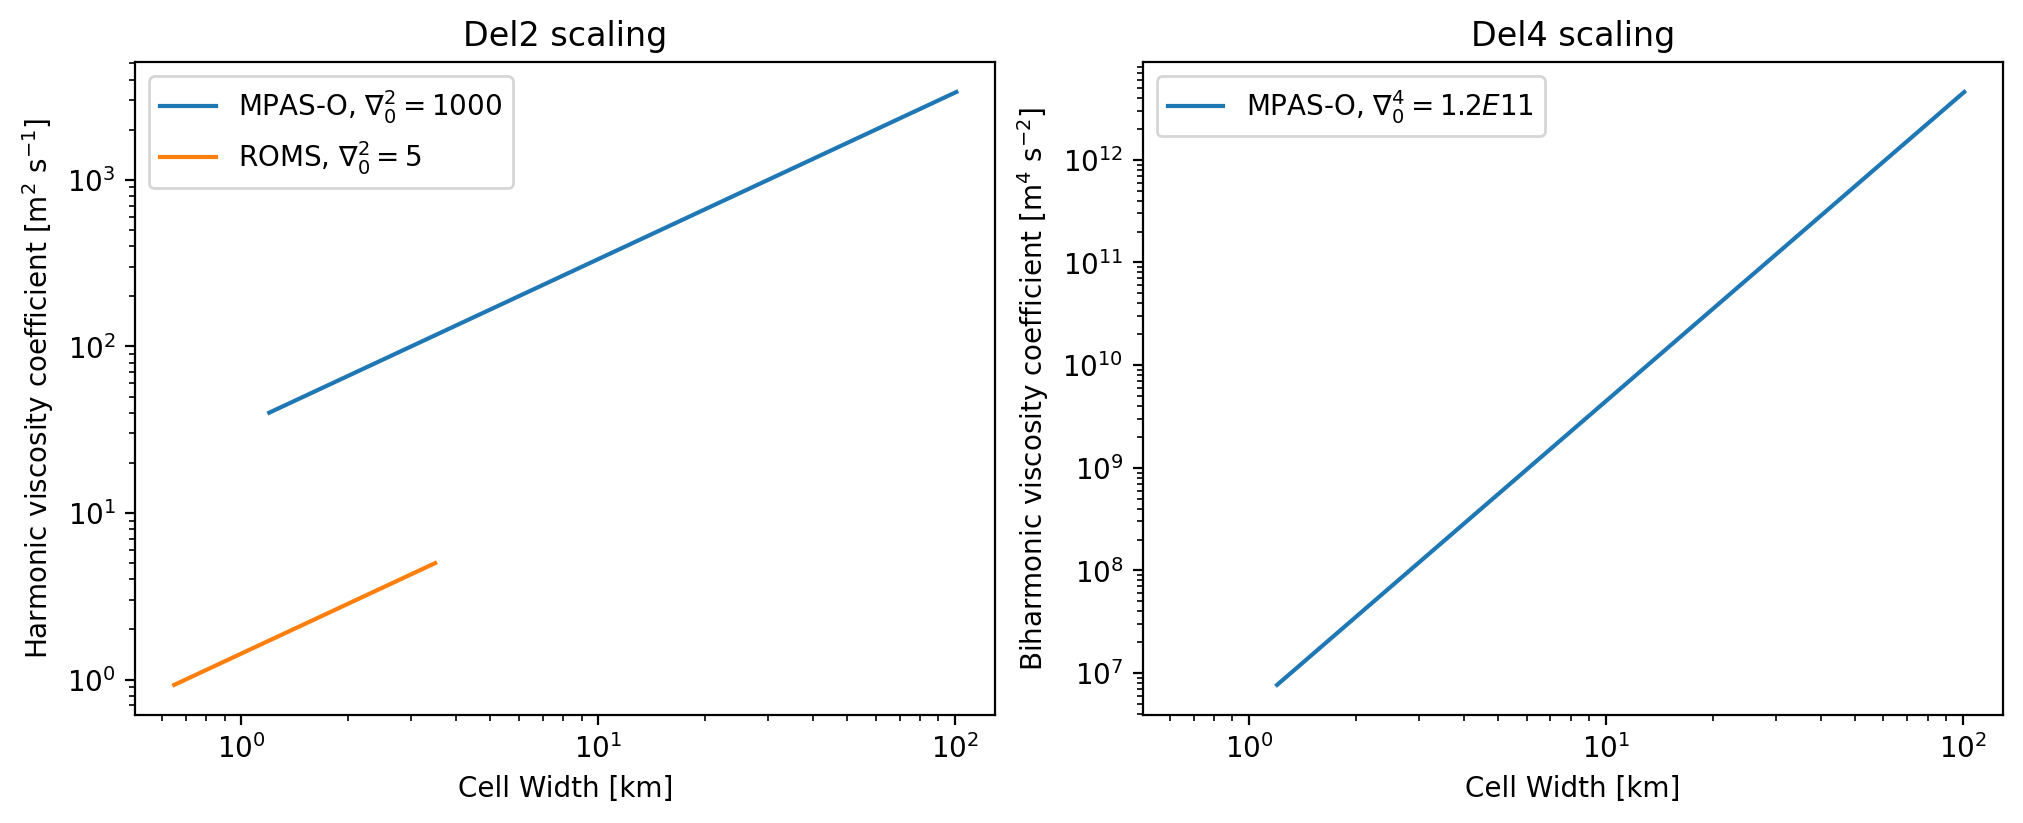

In [68]:
fig,ax = plt.subplots(1,2,figsize = (10,4),
                      constrained_layout = True, sharex = True, dpi = 200)

ax[0].plot(cellWidth/1000, visc2, label = r'MPAS-O, $\nabla^2_{0} = 1000$')
ax[0].set_ylabel(r'Harmonic viscosity coefficient [m$^2$ s$^{-1}$]')
ax[0].set_title(r'Del2 scaling')
ax[1].set_title('Del4 scaling')
ax[0].plot(txla_width/1000, kh, label = r'ROMS, $\nabla^2_{0} = 5$')

ax[1].set_ylabel(r'Biharmonic viscosity coefficient [m$^4$ s$^{-2}$]')
ax[1].plot(cellWidth/1000, visc4, label = r'MPAS-O, $\nabla^4_{0} = 1.2E11$')

for i in range(2):
    ax[i].semilogx()
    ax[i].semilogy()
    ax[i].set_xlabel('Cell Width [km]')
    ax[i].legend()

### Same plot in linear space 

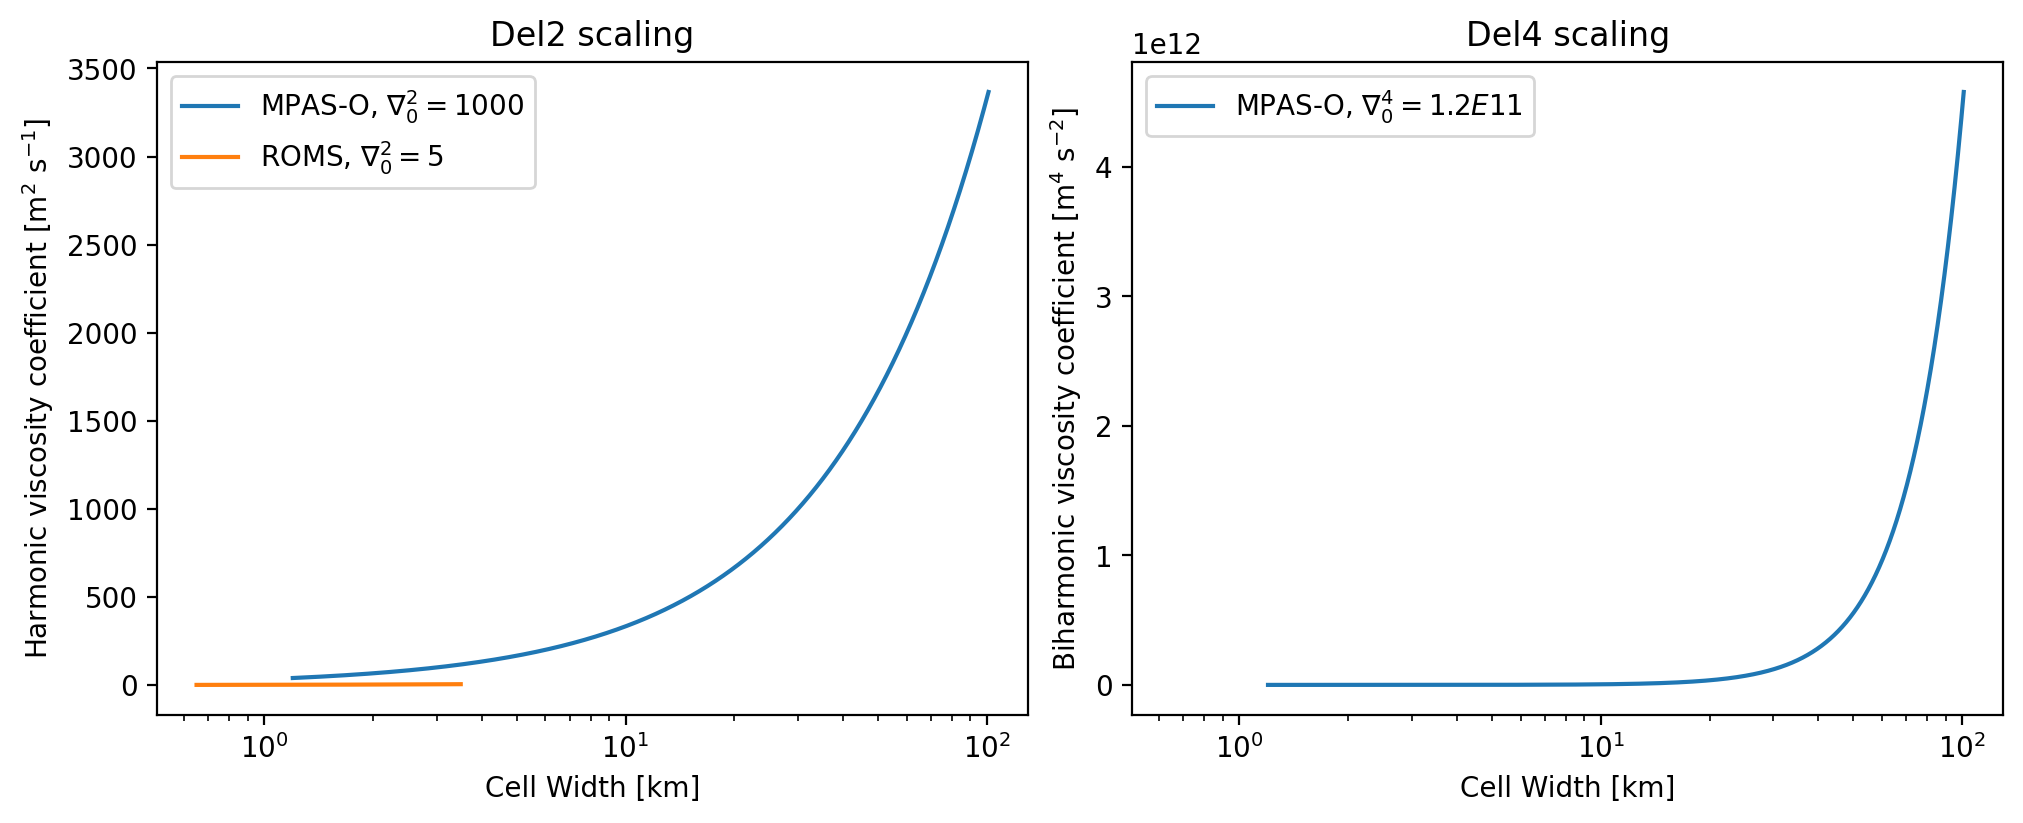

In [69]:
fig,ax = plt.subplots(1,2,figsize = (10,4),
                      constrained_layout = True, sharex = True, dpi = 200)

ax[0].plot(cellWidth/1000, visc2, label = r'MPAS-O, $\nabla^2_{0} = 1000$')
ax[0].set_ylabel(r'Harmonic viscosity coefficient [m$^2$ s$^{-1}$]')
ax[0].set_title(r'Del2 scaling')
ax[1].set_title('Del4 scaling')
ax[0].plot(txla_width/1000, kh, label = r'ROMS, $\nabla^2_{0} = 5$')

ax[1].set_ylabel(r'Biharmonic viscosity coefficient [m$^4$ s$^{-2}$]')
ax[1].plot(cellWidth/1000, visc4, label = r'MPAS-O, $\nabla^4_{0} = 1.2E11$')

for i in range(2):
    ax[i].semilogx()
    # ax[i].semilogy()
    ax[i].set_xlabel('Cell Width [km]')
    ax[i].legend()

### Horizontal tracer mixing
MPAS-O doesn't use any horizontal mixing for tracers by default. However, work by Schlichting et al. (2024) *JAMES* suggests small amounts of tracer diffusion can reduce numerical mixing at fronts without oversmoothing

In [74]:
kappa_0 = 10
kappah = kappa_0*meshScalingDel2

kh_0 = 1.0 #m^2/s
kh = (kh_0/dA_max)*(np.sqrt(dA))

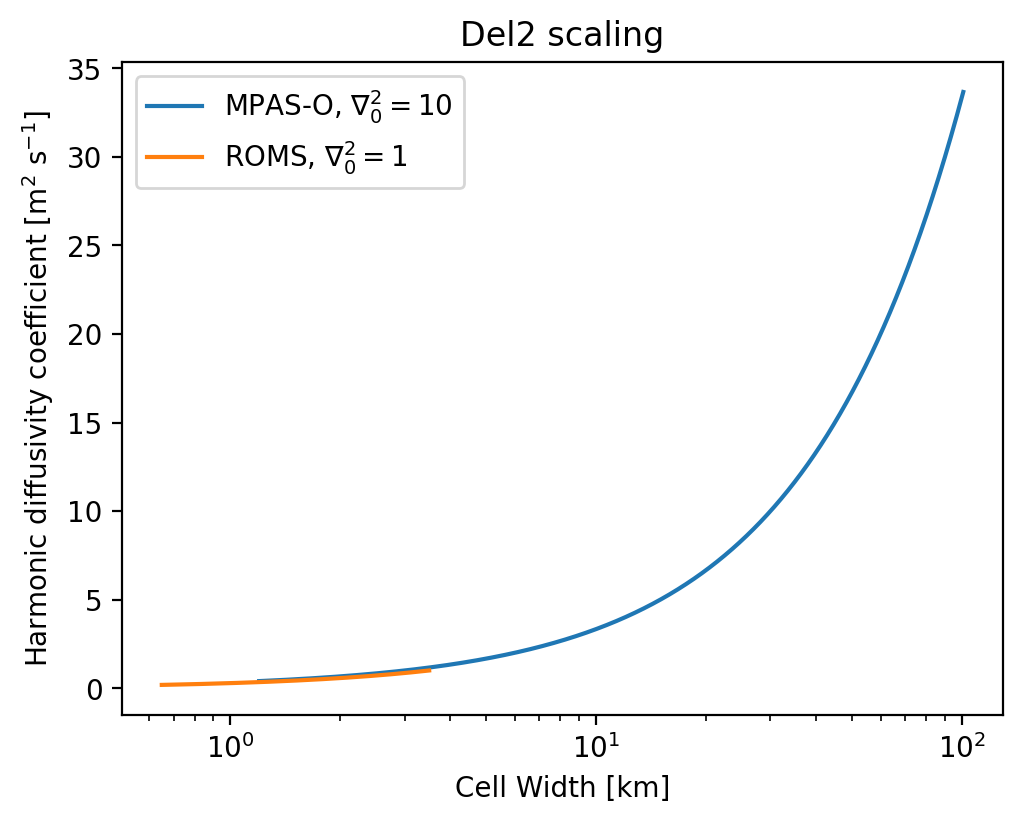

In [78]:
fig,ax = plt.subplots(1,1,figsize = (5,4),
                      constrained_layout = True, sharex = True, dpi = 200)

ax.plot(cellWidth/1000, kappah, label = r'MPAS-O, $\nabla^2_{0} = 10$')
ax.set_ylabel(r'Harmonic diffusivity coefficient [m$^2$ s$^{-1}$]')
ax.set_title('Del2 scaling')
ax.plot(txla_width/1000, kh, label = r'ROMS, $\nabla^2_{0} = 1$')

ax.semilogx()
ax.set_xlabel('Cell Width [km]')
ax.legend()